In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Statistical libraries
from scipy import stats
from scipy.stats import zscore, skew

# Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print('Libraries imported successfully')

Libraries imported successfully


In [2]:
#1.1 Load the dataset into pandas Dataframe.
#url = "https://raw.githubusercontent.com/Naeema-cyber/dataset_sample/refs/heads/main/home_loan_train.csv"
path = r"C:\Users\Dell\Desktop\sample_datasets\dataset_sample\home_loan_train.csv"
home_loan = pd.read_csv(path)
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df = home_loan.copy()


In [4]:
# Handle Missing Values ---
# Fill numeric columns with median
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# --- Split and Encode ---
y = df['Loan_Status']
X = df.drop(columns=['Loan_Status'])

In [14]:
# slpit the data


# Split features and target
y = df['Loan_Status']
X = df.drop(columns=['Loan_Status'])

# X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=234)

# Encode categorical variables automatically
X = pd.get_dummies(X, drop_first=True)
y = LabelEncoder().fit_transform(y)  # 1 for Y, 0 for N (for example)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale numeric features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)




,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


 Baseline Logistic Regression Accuracy: 0.7723577235772358

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.37      0.53        43
           1       0.75      0.99      0.85        80

    accuracy                           0.77       123
   macro avg       0.84      0.68      0.69       123
weighted avg       0.81      0.77      0.74       123



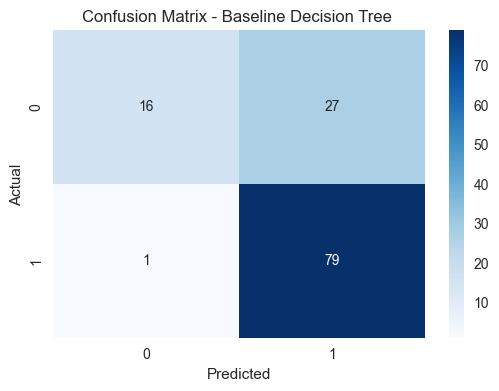

In [15]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print(" Baseline Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Baseline Decision Tree ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [7]:
# Using DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
# Evaluate Model Performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.42      0.48        43
           1       0.73      0.82      0.77        80

    accuracy                           0.68       123
   macro avg       0.64      0.62      0.63       123
weighted avg       0.67      0.68      0.67       123



Baseline Decision Tree Accuracy: 0.683

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        43
           1       0.73      0.82      0.77        80

    accuracy                           0.68       123
   macro avg       0.64      0.62      0.63       123
weighted avg       0.67      0.68      0.67       123



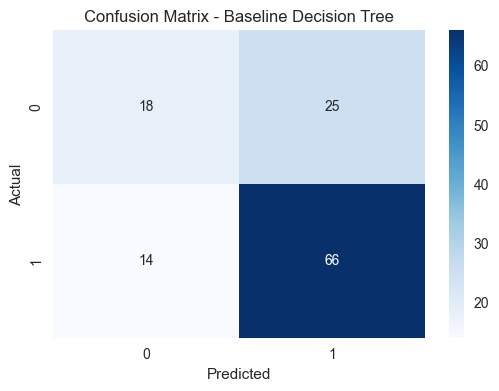

In [9]:
# Classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Decision Tree Accuracy: {accuracy:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusuin Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Our Base Model Reports**

### **EDA-Based Data Quality Assessment**

Based on the EDA findings, let's assess the specific issues identified.

In [10]:
# 1. Check for missing values.
print("\n1. Missing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values found")
    
    
# 2. Check for duplicates
print("\n2. Duplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")
    
# 3. Check skewness for variables identified in EDA as right_skewed
print("\n3. Skewness Analysis (EDA identified right_skewedvariables):")
skewed_vars = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
for var in skewed_vars:
    if var in df.columns:
        skewness = skew(df[var])
        shape = 'right-skewed' if skewness > 0.5 else 'approximately normal'
        print(f'{var}: skewness = {skewness:.3f}({shape})')

# 4. Check correlation with target (EDA evidence)
print("\n4. Correlation with Loan Status (EDA Evidence):")

df['Loan_Status'].replace({'Y': 1, 'N': 0},  inplace=True)

numeric_df = df.select_dtypes(include='number')

correlations = numeric_df.corr()['Loan_Status'].sort_values(key=abs, ascending=False)

print("High - signal features (|correlation| > 0.2):")

high_signal = correlations[abs(correlations) > 0.2].drop('Loan_Status', errors='ignore')
for feature, corr in high_signal.items():
    print(f" {feature}: {corr:.3f}")
    
print("\nLow-signal features (|correlation| < 0.1):")
low_signal = correlations[abs(correlations) < 0.1]
for feature, corr in low_signal.items():
    print(f" {feature}: {corr:.3f}")


1. Missing Values:
No missing values found

2. Duplicate Rows:
Number of duplicate rows: 0

3. Skewness Analysis (EDA identified right_skewedvariables):
ApplicantIncome: skewness = 6.524(right-skewed)
CoapplicantIncome: skewness = 7.473(right-skewed)
LoanAmount: skewness = 2.736(right-skewed)

4. Correlation with Loan Status (EDA Evidence):
High - signal features (|correlation| > 0.2):
 Credit_History: 0.541

Low-signal features (|correlation| < 0.1):
 CoapplicantIncome: -0.059
 LoanAmount: -0.033
 Loan_Amount_Term: -0.023
 ApplicantIncome: -0.005


### **Log-Transform Skewed Variables (EDA Recommendation)**

Based on EDA findings, transform the right- skewed variables identified

In [11]:
print("=== LOG-TRANSFORMING SKEWED VARIABLES ===")
print("EDA identified these variables as right-skewed and recommended log transformation:")

# Variables to log-transform based on EDA findings
skewed_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for var in skewed_vars:
    if var in df.columns:
        # Check if variable has zero or negative values
        min_val = df[var].min()
        if min_val <=0:
            # use log1p for variables with zeros
            df[f'{var}_log'] = np.log1p(df[var])
            print(f"✓{var}: Applied log transformation (had {min_val:.3f} minimum value)")
        else:
            # Use for positive values only
            df[f"{var}_log"] = np.log(df[var])
            print(f"✓ {var}: Applied log transformation")
        
        # Check skewness before and after
        original_skew = skew(df[var])
        transformed_skew = skew(df[f'{var}_log'])
        print(f" Original skewness: {original_skew:.3f}  → Transformed skewness: {transformed_skew:.3f}")
print(f"\nDataset shape after log transformation: {df.shape}")
print("New-log transformed columns:", [col for col in df.columns if '_log' in col])

=== LOG-TRANSFORMING SKEWED VARIABLES ===
EDA identified these variables as right-skewed and recommended log transformation:
✓ ApplicantIncome: Applied log transformation
 Original skewness: 6.524  → Transformed skewness: 0.478
✓CoapplicantIncome: Applied log transformation (had 0.000 minimum value)
 Original skewness: 7.473  → Transformed skewness: -0.173
✓ LoanAmount: Applied log transformation
 Original skewness: 2.736  → Transformed skewness: -0.195
✓ Loan_Amount_Term: Applied log transformation
 Original skewness: -2.396  → Transformed skewness: -4.857

Dataset shape after log transformation: (614, 17)
New-log transformed columns: ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log']


### **Feature Engineering**

**Implement the specific feature engineering recommendations from the EDA report.**

In [18]:
print("FEATURE ENGINEERING BASED ON EDA RECOMMENDATIONS")

# 1. Loan Amount to Income Ratio 
ratio = 1e-6 # Small constant to avoid divide-by-zero

df['LA_to_IN_ratio'] = df['LoanAmount'] / (df['ApplicantIncome'] + ratio)
print("- LA_to_IN_ratio: LoanAnount/ApplicantIncome")

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
print("- Total Income: ApplicantIncome + CoapplicantIncome")
print(f"New engineered features: {[col for col in df.columns if col not in home_loan.columns]}")

FEATURE ENGINEERING BASED ON EDA RECOMMENDATIONS
- LA_to_IN_ratio: LoanAnount/ApplicantIncome
- Total Income: ApplicantIncome + CoapplicantIncome
New engineered features: ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log', 'LA_to_IN_ratio', 'Total_Income']


#### **Feature Selection**

Based on EDA correlation analysis, select high_signal features and  evaluate low-signal ones.

In [21]:
# Feature selection based on EDA correlation evidence
print("=== FEATURE SELECTION BASED ON EDA CORRELATION EVIDENCE ===")

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print(f"Total features available: {X.shape[1]}")

# EDA-identified high-signal features (|correlation| > 0.2)
high_signal_features = ['credit_history']
print(f"\nEDA-identified high-signal features: {high_signal_features}")

# EDA-identified high-signal features (|correlation| < 0.1)
low_signal_features = ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome']
print(f"EDA-identified low-signal features: {low_signal_features}")

# Check which features are actually available
available_high_signal = [f for f in high_signal_features if f in X.columns]
available_low_signal = [f for f in low_signal_features if f in X.columns]

print(f"\nAvailable high-signal features: {available_high_signal}")
print(f"\nAvailable low_signal features: {available_low_signal}")

# Create feature sets for evaluation
print("\n=== FEATURE SETS FOR EVALUATION ===")

# set 1: All original features (excluding low_signal)
features_exclude_low_signal = [col for col in X.columns if col not in low_signal_features]
print(f"set 1 - Exclude low-signal features: {len(features_exclude_low_signal)} features")

# set 2: High-signal + engineered features

high_signal_plus_engineered = available_high_signal + [col for col in X.columns if any (keyword in col.lower() for keyword in ['ratio', 'total', 'log'])]
print(f"Set 2 - High-Signal + Engineered: {len(high_signal_plus_engineered)} features")

# Set 3: All features (for comparison)
all_features = list(X.columns)
print(f"Set 3 - All features: {len(all_features)} features")

# Let's use Set 2 (high-signal + engineered) as recommended by EDA 
selected_features = high_signal_plus_engineered
print(f"\n Selected features set: {len(selected_features)} features")
print("Selected features:", selected_features)

=== FEATURE SELECTION BASED ON EDA CORRELATION EVIDENCE ===
Total features available: 18

EDA-identified high-signal features: ['credit_history']
EDA-identified low-signal features: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome']

Available high-signal features: []

Available low_signal features: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome']

=== FEATURE SETS FOR EVALUATION ===
set 1 - Exclude low-signal features: 14 features
Set 2 - High-Signal + Engineered: 6 features
Set 3 - All features: 18 features

 Selected features set: 6 features
Selected features: ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log', 'LA_to_IN_ratio', 'Total_Income']


### **Stratified Data Splitting**

Based on EDA findings about class imbLnce, use stratified splitting